# 12_Sequential Class 코딩 연습


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

# 1. Linear Regression : 조금 어려운 데이터

### 1.1 데이터 준비

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
x = boston.data
y = boston.target

x.shape, y.shape

((506, 13), (506,))

In [6]:
# 데이터 분할
from sklearn.model_selection import train_test_split
# 전체에서 train : test = 8 : 2
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)


In [7]:
train_x.shape

(404, 13)

**이번에는 Input과 Output 사이에 Layer 하나를 추가합니다.**  
**이를 히든레이어라고 부릅니다.**  
**먼저 Network을 그려봅시다**

### 1.2 모델링

In [63]:
# 1. 모델 선언하기
# ①세션 비우기 : 기계적으로 수행하자.
keras.backend.clear_session()

# ② 모델 정의
model = keras.models.Sequential()

# ③ 블록 준비
hl = keras.layers.Dense(20, input_shape = (13,))
h2 = keras.layers.Dense(64, input_shape = (20,))
h3 = keras.layers.Dense(128, input_shape = (64,))
h4 = keras.layers.Dense(64, input_shape = (128,))
h5 = keras.layers.Dense(20, input_shape = (64,))
ol = keras.layers.Dense(1, input_shape = (20,))

# ④ model에 블럭 추가하기
model.add(hl)
model.add(h2)
model.add(h3)
model.add(h4)
model.add(h5)
model.add(ol)

# ⑤ Compile
model.compile(loss = 'mse', optimizer = 'adam')


In [64]:
# 모델을 열어 봅시다.
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                280       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1300      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 19,521
Trainable params: 19,521
Non-trainable params: 0
____________________________________________________

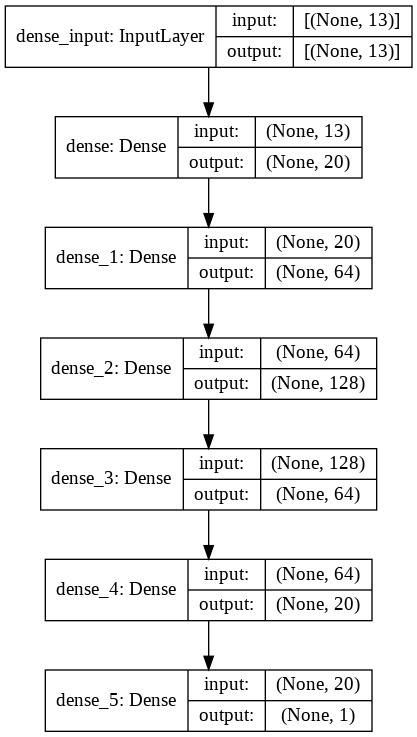

In [65]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)


In [66]:
# 2. 학습시키기
model.fit(train_x, train_y, epochs=30)


Epoch 1/30
13/13 [==============================] - 0s 2ms/step - loss: 9680.8686
Epoch 2/30
13/13 [==============================] - 0s 2ms/step - loss: 1869.7371
Epoch 3/30
13/13 [==============================] - 0s 1ms/step - loss: 513.0314
Epoch 4/30
13/13 [==============================] - 0s 2ms/step - loss: 195.8572
Epoch 5/30
13/13 [==============================] - 0s 2ms/step - loss: 81.4777
Epoch 6/30
13/13 [==============================] - 0s 2ms/step - loss: 73.2369
Epoch 7/30
13/13 [==============================] - 0s 2ms/step - loss: 69.6198
Epoch 8/30
13/13 [==============================] - 0s 2ms/step - loss: 71.9570
Epoch 9/30
13/13 [==============================] - 0s 2ms/step - loss: 68.1252
Epoch 10/30
13/13 [==============================] - 0s 2ms/step - loss: 53.9469
Epoch 11/30
13/13 [==============================] - 0s 2ms/step - loss: 59.7544
Epoch 12/30
13/13 [==============================] - 0s 1ms/step - loss: 55.7891
Epoch 13/30
13/13 [============

In [67]:
# 3. 예측하기
test_pred = model.predict(test_x)


In [68]:
# 4. 평가하기
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, test_pred)


6.135689403379664

##1.3 실습
    1) 히든레이어의 노드수를 늘려서 모델링을 수행한후 성능을 비교해 봅시다.
    2) 히든레이어를 2개 만들어서 모델링을 수행한 후 성능을 비교해 봅시다.

# 2. Logistic Regression : 조금 어려운 데이터

### 2.1 데이터 준비

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
x = cancer.data
y = cancer.target

# 모양 확인해볼 것
x.shape, y.shape

In [ ]:
cancer.target_names

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split
# 전체에서 train : test = 8 : 2
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)


In [ ]:
train_x.shape

### 2.2 모델링

**Network를 설계해 봅시다.**

* hidden layer의 수와 노드수를 정하여 그림을 먼저 그려봅시다.
* 그리고 코드로 옮겨 봅시다.



In [ ]:
# 1. 모델 선언하기
# ①세션 비우기 : 기계적으로 수행하자.


# ② 모델 정의



# ③ 블록 준비 (hidden layer의 activaition = 'relu', output layer는 'sigmoid')



# ④ model에 블럭 추가하기


# ⑤ 컴파일



In [ ]:
# 모델을 열어 봅시다.




In [ ]:
# 2. 학습시키기



In [ ]:
# 3. 예측하기
test_pred = model.predict(test_x)


In [ ]:
test_pred

In [ ]:
# class로 아예 구분해서 예측하려면 
test_pred2 = model.predict_classes(test_x)

In [ ]:
# 4. 평가하기
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
test_pred2

In [ ]:
accuracy_score(test_y, test_pred2)

In [ ]:
print(classification_report(test_y, test_pred2))

In [ ]:
print(confusion_matrix(test_y, test_pred2))